In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Question 1

#### Section 1

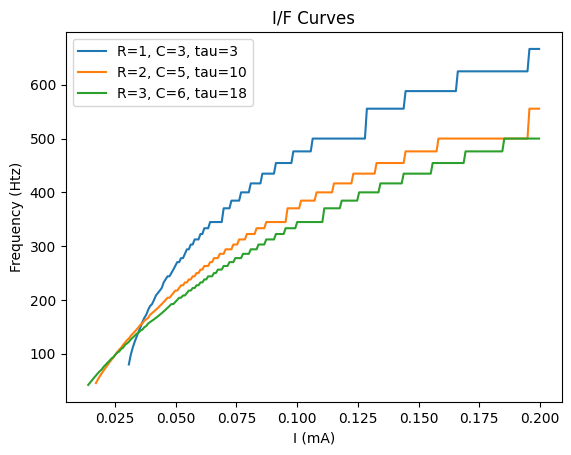

In [8]:
# Model Parameters:
T = 50    # Simulation time          [mSec]
dt = 0.1   # Simulation time interval [mSec]
t_init = 0     # Stimulus init time       [V]
vRest = -70   # Resting potential        [mV]
Rm = 1     # Membrane Resistance      [kOhm]
Cm = 5     # Capacitance              [uF]
tau_ref = 1     # Repreactory Period       [mSec]
vTh = -40   # Spike threshond          [mV]
I = 0.2   # Current stimulus         [mA]
vSpike = 50    # Spike voltage            [mV]

# Simulation parameters:
time = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
Vm = np.ones(len(time))*vRest*1e-3            # Membrane voltage array

# Defining the stimulus:
stim = I*1e-3 * signal.triang(len(time))  # Triangular stimulation pattern


def get_if_curve_data(Rm = 1 , Cm = 5):
    tau_m = Rm*1e3 * Cm*1e-6                         # Time constant
    spikes = []            # Spikes timings
    IF_I = []
    IF_F = []

    for j, current in enumerate(stim):
        if j > 0 and stim[j-1] > current:

            break
        spike_voltage = []
        spike_times = []
        local_Vm = np.copy(Vm)
        spike_index = 0
        t_init = 0
        for i, current_time in enumerate(time[:-1]):
            if current_time >= t_init:
                uinf = vRest*1e-3 + Rm*1e3 * current  # current
                local_Vm[i+1] = uinf + \
                    (local_Vm[i] - uinf) * np.exp(-dt*1e-3 / tau_m)
                if local_Vm[i] >= vTh * 1e-3:
                    spike_index += 1
                    spike_times.append(current_time)
                    spikes.append(current_time * 1e3)
                    spike_voltage.append(local_Vm[i])
                    local_Vm[i] = vSpike*1e-3
                    t_init = current_time + tau_ref * 1e-3
        if spike_index >= 2:
            IF_I.append(current*1000)
            IF_F.append(1 / ((spike_times[1] - spike_times[0])))

    return IF_I, IF_F




plt.figure()
plt.title('I/F Curves')
plt.ylabel('Frequency (Htz)')
plt.xlabel('I (mA)')

tau_values = [(1, 3), (2, 5), (3, 6)] # where tau is R*C
for r,c in tau_values:
    x, y = get_if_curve_data(r, c)
    plt.plot(x, y, label=f'R={r}, C={c}, tau={r*c}')
plt.legend()
plt.show()



### Section 2




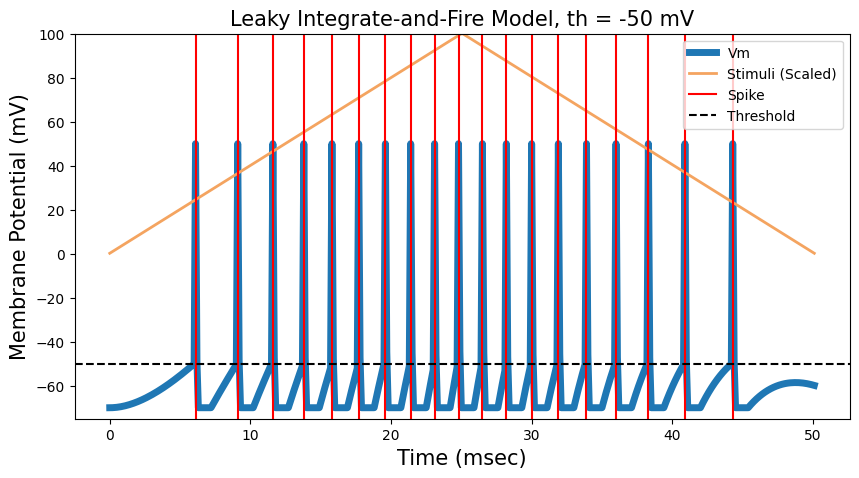

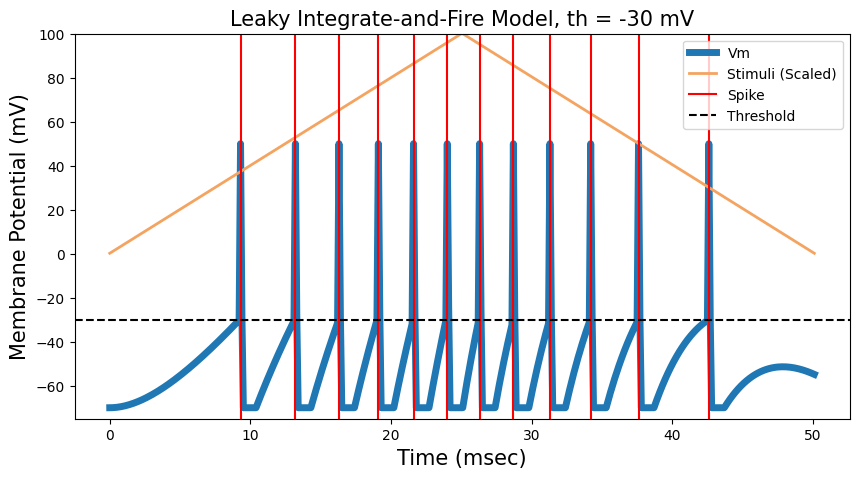

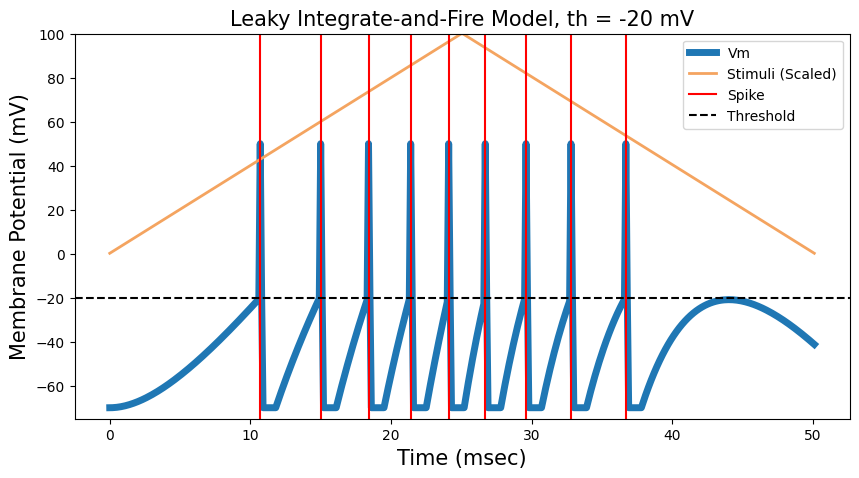

In [15]:
def create_vt_graph(th):
    T       = 50    # Simulation time          [mSec]
    dt      = 0.1   # Simulation time interval [mSec]
    t_init  = 0     # Stimulus init time       [V]
    vRest   = -70   # Resting potential        [mV]
    Rm      = 1     # Membrane Resistance      [kOhm]
    Cm      = 5     # Capacitance              [uF]
    tau_ref = 1     # Repreactory Period       [mSec]
    vTh     = th  # Spike threshond          [mV]
    I       = 0.2   # Current stimulus         [mA]
    vSpike  = 50    # Spike voltage            [mV]

    time    = np.arange(0, T*1e-3 + dt*1e-3, dt*1e-3)  # Time array
    Vm      = np.ones(len(time))*vRest*1e-3            # Membrane voltage array
    tau_m   = Rm*1e3 * Cm*1e-6                         # Time constant 
    spikes  = []       


    stim = I*1e-3 * signal.triang(len(time)) # Triangular stimulation pattern

    for i, t in enumerate(time[:-1]):
        if t > t_init:
            uinf = vRest*1e-3 + Rm*1e3 * stim[i]
            Vm[i+1] = uinf + (Vm[i]-uinf)*np.exp(-dt*1e-3/tau_m)
            if Vm[i] >= vTh*1e-3:
                spikes.append(t*1e3) 
                Vm[i]=vSpike*1e-3
                t_init = t + tau_ref*1e-3


    plt.figure(figsize=(10,5))
    plt.title(f'Leaky Integrate-and-Fire Model, th = {th} mV', fontsize=15) 
    plt.ylabel('Membrane Potential (mV)', fontsize=15) 
    plt.xlabel('Time (msec)', fontsize=15)
    plt.plot(time*1e3, Vm*1e3, linewidth=5, label = 'Vm')
    plt.plot(time*1e3, 100/max(stim)*stim, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
    plt.ylim([-75,100])
    plt.axvline(x=spikes[0], c='red', label = 'Spike')
    for s in spikes[1:]:
        plt.axvline(x=s, c='red')
    plt.axhline(y=vTh, c='black', label = 'Threshold', linestyle='--')
    plt.legend()



for th in [-50, -30, -20]:
    create_vt_graph(th)



### Section 3

In [9]:
T       = 50    # Simulation time          [mSec]
t_init  = 0     # Stimulus init time       [V]
vRest   = -70   # Resting potential        [mV]
Rm      = 1     # Membrane Resistance      [kOhm]
Cm      = 5     # Capacitance              [uF]
tau_ref = 1     # Repreactory Period       [mSec]
I       = 0.2   # Current stimulus         [mA]
vSpike  = 50    # Spike voltage            [mV]

for th in [-50, -30, -20]:
    dt = -(Rm * Cm) * np.log(1 - ((th - vRest) / (Rm * I*1000)))
    print(f'Threshold: {th} mV, dt: {dt*10} mSec')

Threshold: -50 mV, dt: 5.268025782891314 mSec
Threshold: -30 mV, dt: 11.157177565710485 mSec
Threshold: -20 mV, dt: 14.384103622589045 mSec


## Question 2

#### Section 1

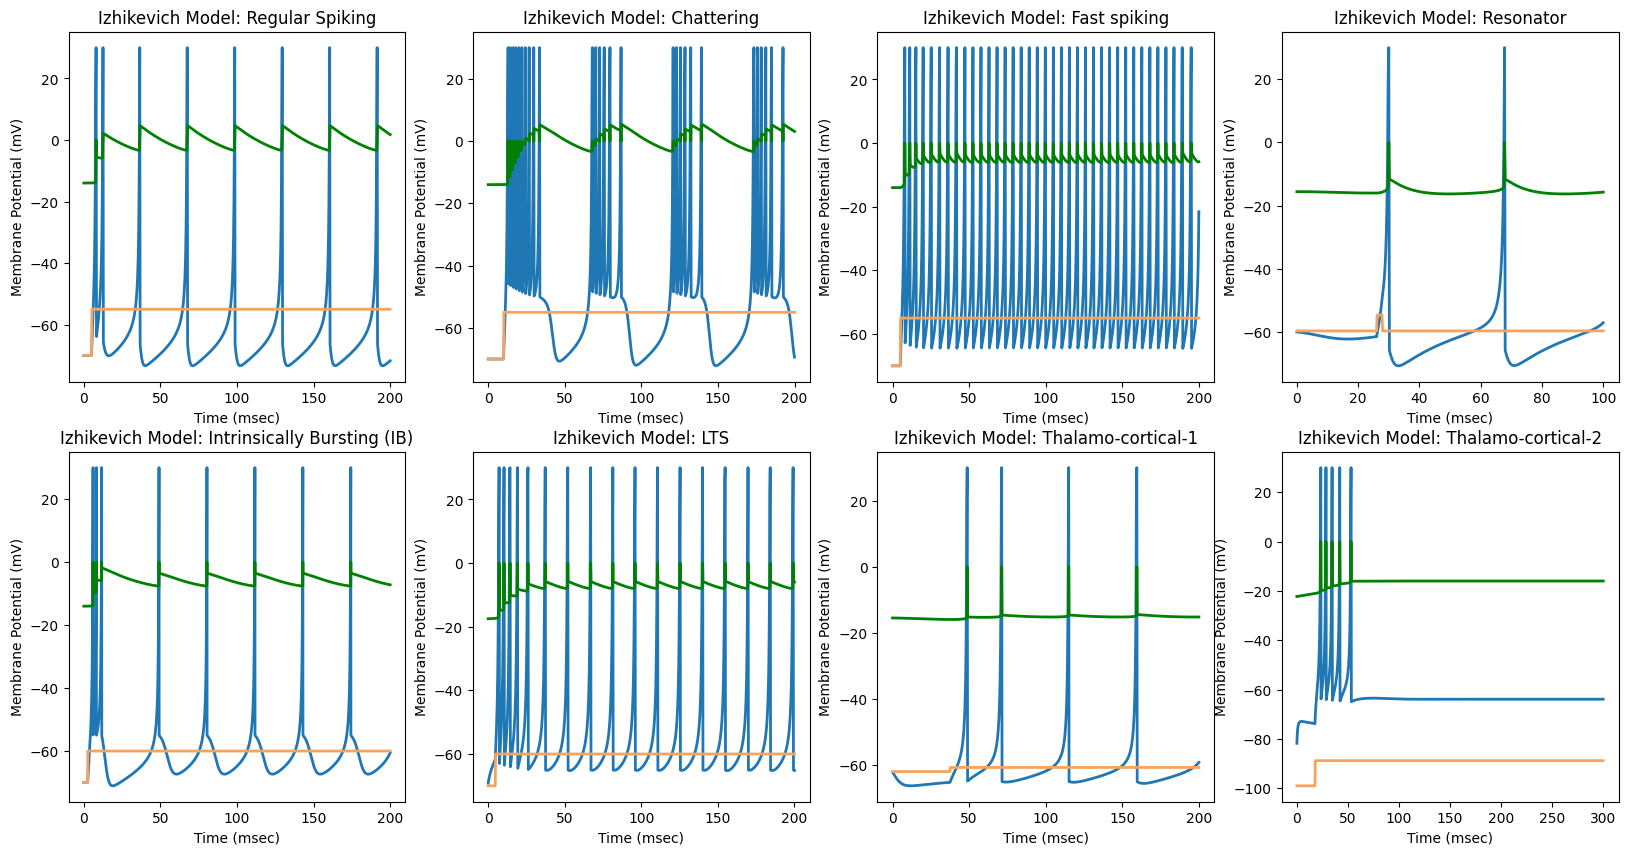

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def plot_itzkovitsh_model(a,b,
               c,d,
               T,dt,
               stim_index,stim_value,
               title,v0 =-70, axis=None):
    x  = 5
    y  = 140

    
    time    = np.arange(0, T + dt, dt)  # Time array
    stim = np.zeros(len(time))
    if title == 'Thalamo-cortical-2':
        for i in range(len(stim)):
            if i < stim_index:
                stim[i] = -10

    if title == 'Resonator':
        for i,t in enumerate(stim):
            stim[i] = stim_value
            if i > 130 and i < 140:
                stim[i] = stim_value+5
            
    else:
        for i,t in enumerate(stim):
            if i > stim_index:
                stim[i] = stim_value
    
    #print (stim)
    trace = np.zeros((2,len(time))) # Tracing du and dv
    #print(stim)
    v  = v0
    u  = b*v
    spikes = []
    for i, j in enumerate(stim):
        v += dt * (0.04*v**2 + x*v + y - u + stim[i]) 
        u += dt * a*(b*v-u)
        if v > 30:
            trace[0,i] = 30
            v = c
            u += d
        else:
            trace[0,i] = v 
            trace[1,i] = u
    axis.set_title(f'Izhikevich Model: {title}', ) 
    axis.set_ylabel('Membrane Potential (mV)', ) 
    axis.set_xlabel('Time (msec)', )
    axis.plot(time, trace[0], linewidth=2, label = 'Vm')
    axis.plot(time, trace[1], linewidth=2, label = 'Recovery', color='green')
    axis.plot(time, stim + v0, label = 'Stimuli (Scaled)', color='sandybrown', linewidth=2)
figure, axises = plt.subplots(2, 4, figsize=(20,10))

models_configs = [
    (0.02,0.2,-65,8,200,0.25,20,15,'Regular Spiking'),
    (0.02,0.2,-50,2,200,0.25,40,15,'Chattering'),
    (0.1,0.2,-65,2,200,0.25,20,15,'Fast spiking'),
    (0.1,0.26,-65,2,100,0.2,10,0.3,'Resonator',-60),
    (0.02,0.2,-55,4,200,0.02,125,10,'Intrinsically Bursting (IB)'),
    (0.02,0.25,-65,2,200,0.23,20,10,'LTS'),
    (0.02,0.25,-65,0.05,200,0.25,150,1.25,'Thalamo-cortical-1',-62),
    (0.02,0.25,-65,0.05,300,0.3,60,0.2,'Thalamo-cortical-2',-89)
]
for i, models_config in enumerate(models_configs):
    plot_itzkovitsh_model(*models_config, axis=axises[i//4, i%4])

plt.show()


## Question 3

#### Section 2 + 4

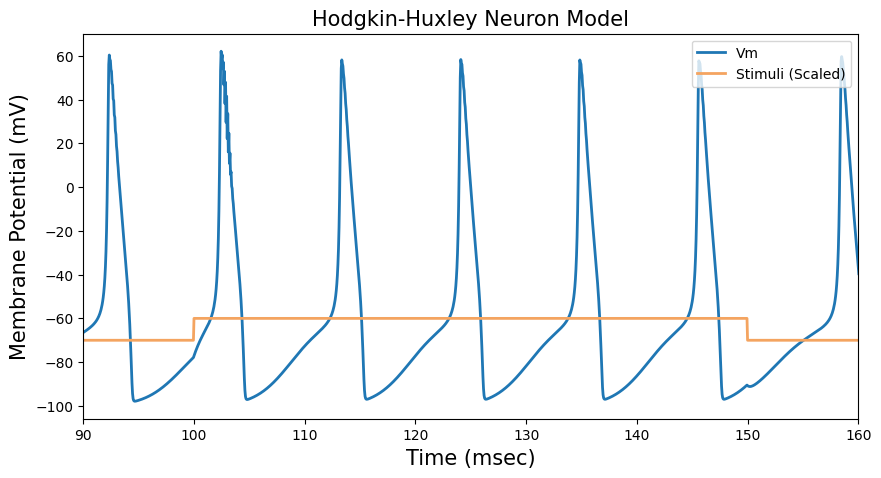

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

class HHModel():

    class Gate:
        alpha, beta, state = 0, 0, 0

        def update(self, deltaTms):
            alphaState = self.alpha * (1-self.state)
            betaState = self.beta * self.state
            self.state += deltaTms * (alphaState - betaState)

        def setInfiniteState(self):
            self.state = self.alpha / (self.alpha + self.beta)

    ENa, EK, EKleak = 140, -30, 50
    gNa, gK, gKleak = 120, 36, 0.3
    m, n, h = Gate(), Gate(), Gate()
    Cm = 1

    def __init__(self, startingVoltage=0):
        self.Vm = startingVoltage
        self.UpdateGateTimeConstants(startingVoltage)
        self.m.setInfiniteState()
        self.n.setInfiniteState()
        self.h.setInfiniteState()
        self.INa = 0
        self.IK  = 0
        self.IKleak = 0
        self.Isum = 0

    def UpdateGateTimeConstants(self, Vm):
        self.n.alpha = .01 * ((10-Vm) / (np.exp((10-Vm)/10)-1))
        self.n.beta = .125*np.exp(-Vm/80)
        self.m.alpha = .1*((25-Vm) / (np.exp((25-Vm)/10)-1))
        self.m.beta = 4*np.exp(-Vm/18)
        self.h.alpha = .07*np.exp(-Vm/20)
        self.h.beta = 1/(np.exp((30-Vm)/10)+1)

    def UpdateCellVoltage(self, stimulusCurrent, deltaTms):
        self.INa = np.power(self.m.state, 3) * self.gNa * \
                   self.h.state*(self.Vm-self.ENa)
        self.IK = np.power(self.n.state, 4) * self.gK * (self.Vm-self.EK)
        self.IKleak = self.gKleak * (self.Vm-self.EKleak)
        self.Isum = stimulusCurrent - self.INa - self.IK - self.IKleak
        self.Vm += deltaTms * self.Isum / self.Cm

    def UpdateGateStates(self, deltaTms):
        self.n.update(deltaTms)
        self.m.update(deltaTms)
        self.h.update(deltaTms)

    def Iterate(self, stimulusCurrent=0, deltaTms=0.05):
        self.UpdateGateTimeConstants(self.Vm)
        self.UpdateCellVoltage(stimulusCurrent, deltaTms)
        self.UpdateGateStates(deltaTms)


hh = HHModel()
pointCount = 5000
Vm = np.empty(pointCount)
n = np.empty(pointCount)
m = np.empty(pointCount)
h = np.empty(pointCount)
INa = np.empty(pointCount)
IK = np.empty(pointCount)
IKleak = np.empty(pointCount)
Isum = np.empty(pointCount)
times = np.arange(pointCount) * 0.05
stim = np.zeros(pointCount)
stim[2000:3000] = 10

for i in range(len(times)):
    hh.Iterate(stimulusCurrent=stim[i], deltaTms=0.05)
    Vm[i] = hh.Vm
    n[i]  = hh.n.state
    m[i]  = hh.m.state
    h[i]  = hh.h.state
    INa[i] = hh.INa
    IK[i] = hh.IK
    IKleak[i] = hh.IKleak
    Isum[i] = hh.Isum


plt.figure(figsize=(10,5))
plt.plot(times, Vm - 70, linewidth=2, label='Vm')
plt.plot(times, stim - 70, label = 'Stimuli (Scaled)', linewidth=2, color='sandybrown')
plt.ylabel("Membrane Potential (mV)", fontsize=15)
plt.xlabel('Time (msec)', fontsize=15)
plt.xlim([90,160])
plt.title("Hodgkin-Huxley Neuron Model", fontsize=15)
plt.legend(loc=1)
plt.show()